In [185]:
import numpy as np

In [186]:
utomat = 'data/enron_lda_15.csv'
dictionary = 'data/enron_dic.csv'
delim = ','
maxword = 10

In [187]:
# load data
with open(dictionary, 'r') as fin: #'data/enron_dic.csv'
    lines = fin.readlines()
tmpLines = [ line.strip().split('\t') for line in lines ]
dic = { int(l[0]): (l[1].strip('"')) for l in tmpLines }
uto = np.loadtxt(utomat, delimiter=delim) #','
# RS1 = uto.sum(axis=1)
# RS2 = uto.sum(axis=0)
# #normalized word by topic array
# utonorm = uto / RS1[:,None]
# utonorm = utonorm / RS2[None,:]  

In [188]:
sum(uto[:,1])

1.0000000000004512

In [154]:
# now calculate order of words within each topic (output words)
allWords = []
for j in range(utoorder.shape[1]):
    topic = utoorder[:,j]
    tmp = [ dic[str(wordIdx)] for wordIdx in topic ]
    allWords.append(tmp)

In [155]:
#winning topic per word
winninguto = utonorm.argmax(axis=1)
#frequency table for number of words that are most popular per topic
Nwordsto = Counter(winninguto)
# now calculate order of word within each topic (output index)
utoorder = np.zeros(shape=utonorm.shape)
utoorder_words = np.zeros(shape=utonorm.shape)
idx = utonorm.argsort(axis=0)
utoorder = idx[::-1]


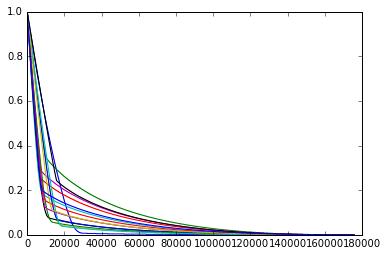

In [159]:
#allWords = np.array(allWords).T
allProbs = []
for j in range(utoorder.shape[1]):
    topic = utoorder[:,j]
    tmp = [ utonorm[wordIdx,j] for wordIdx in topic ]
    tmp = np.cumsum(tmp)
    tmp = 1-tmp
    tmp = np.around(tmp,decimals=3) 
    
    allProbs.append(tmp)

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [141]:
#merge probabilities and words into one large tuple
allProbs_flat = [y for x in allProbs for y in x]
allWords_flat = [y for x in allWords for y in x]
output = zip(allProbs_flat,allWords_flat)
# built dictionary of topics, words and probabilities
wpdict = {}
ntopics = utonorm.shape[1]
nw = utonorm.shape[0]
if maxword > nw:
    maxword = nw
for i in range(ntopics):
    i0 = i*nw
    wpdict["Topic %i" %(i+1) ] = output[i0:(i0+maxword-1)]

In [162]:
len(dic)

175884